# Project: The Movie Database Analysis


<h2>Table of Contents:</h2>
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangle">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#concl">conclusions</a></li>
</ul>

<a  id=intro></a>
<h2> Introduction:</h2>

In this projrct report, I will be analysing the movie database.
I will also focus on answering these questions.

<ul>
<li>What movie genre brings in the most revenue?</li>
<li>Do cast members help with the popularity?</li>
<li>Are longer run time movies have a lower rating?</li>
</ul>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<a id=wrangle></a>
<h2 >Data Wrangling:</h2>

In [2]:
df = pd.read_csv("C:/Users/sbaaw/Desktop/Database_TMDb_movie_data/tmdb-movies.csv")

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.shape

(10866, 21)

<h5>Removing columns that I will not be needing in my analysis</h5>

In [5]:
df.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [6]:
df.drop(['homepage','tagline','keywords','production_companies'], axis = 1, inplace = True)

In [7]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id=eda></a>
<h2>Exploratory Data Analysis:</h2>

<h3> Question 1: What movie genre brings in the most revenue?</h3>

In [8]:
from collections import defaultdict

# Assuming you have the DataFrame df with genres and revenue
def calculate_genre_revenue(df):
    genre_revenue = defaultdict(float)

    # Iterate through each row, split the genres, and add up the revenues
    for index, row in df.iterrows():
        if pd.notnull(row['genres']) and pd.notnull(row['revenue']):
            genres = row['genres'].split('|')
            for genre in genres:
                genre_revenue[genre] += row['revenue']

    # Convert the dictionary to a DataFrame for easy handling and sorting
    genre_revenue_df = pd.DataFrame(list(genre_revenue.items()), columns=['Genre', 'Total Revenue'])

    # Sort the DataFrame based on Total Revenue in descending order
    genre_revenue_df_sorted = genre_revenue_df.sort_values(by='Total Revenue', ascending=False)
    return genre_revenue_df_sorted

#### splitting the genres to have singular value to compare between them. 

### plotting bar chart for movie revenue

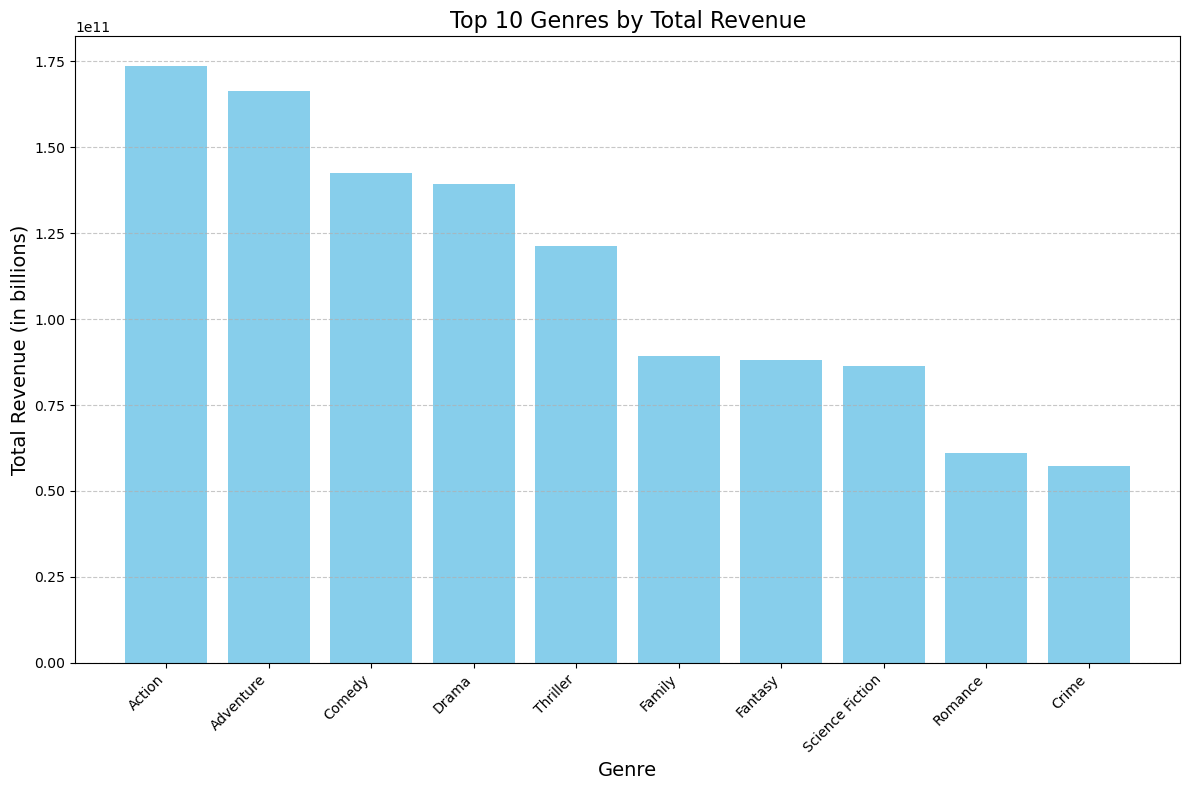

In [9]:
# First, ensure your calculate_genre_revenue function is defined correctly and called to create genre_revenue_df_sorted
genre_revenue_df_sorted = calculate_genre_revenue(df)

# Define the plotting function
def plot_genre_revenue(genre_revenue_df):
    # Select the top ten genres by total revenue
    top_ten_genres = genre_revenue_df.head(10)

    plt.figure(figsize=(12, 8))
    plt.bar(top_ten_genres['Genre'], top_ten_genres['Total Revenue'], color='skyblue')
    plt.title('Top 10 Genres by Total Revenue', fontsize=16)
    plt.xlabel('Genre', fontsize=14)
    plt.ylabel('Total Revenue (in billions)', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()  # Adjusts subplot params so that the subplot(s) fits into the figure area.
    plt.show()

# Call the plotting function with the sorted DataFrame
plot_genre_revenue(genre_revenue_df_sorted)

#### The generes are split to see which one generates the highest revenue.

<h3>Question 2: Do cast members help with the popularity?</h3>

In [10]:
from itertools import chain

# Initialize a dictionary to store the total popularity of movies for each actor
actor_popularity = defaultdict(float)
movie_count = defaultdict(int)

# Iterate through each row, split the cast, and add up the popularity
for index, row in df.iterrows():
    if pd.notnull(row['cast']) and pd.notnull(row['popularity']):
        cast_members = row['cast'].split('|')
        for actor in cast_members:
            actor_popularity[actor] += row['popularity']
            movie_count[actor] += 1

# Convert the dictionary to a DataFrame for easy handling and sorting
actor_popularity_df = pd.DataFrame(list(actor_popularity.items()), columns=['Actor', 'Total Popularity'])
actor_popularity_df['Movie Count'] = actor_popularity_df['Actor'].map(movie_count)

# Calculate average popularity for actors by dividing total popularity by the number of movies they appeared in
actor_popularity_df['Average Popularity'] = actor_popularity_df['Total Popularity'] / actor_popularity_df['Movie Count']

# Sort the DataFrame based on Average Popularity in descending order to find the most popular actors
actor_popularity_df_sorted = actor_popularity_df.sort_values(by='Average Popularity', ascending=False)

### plotting horizontal bar chart

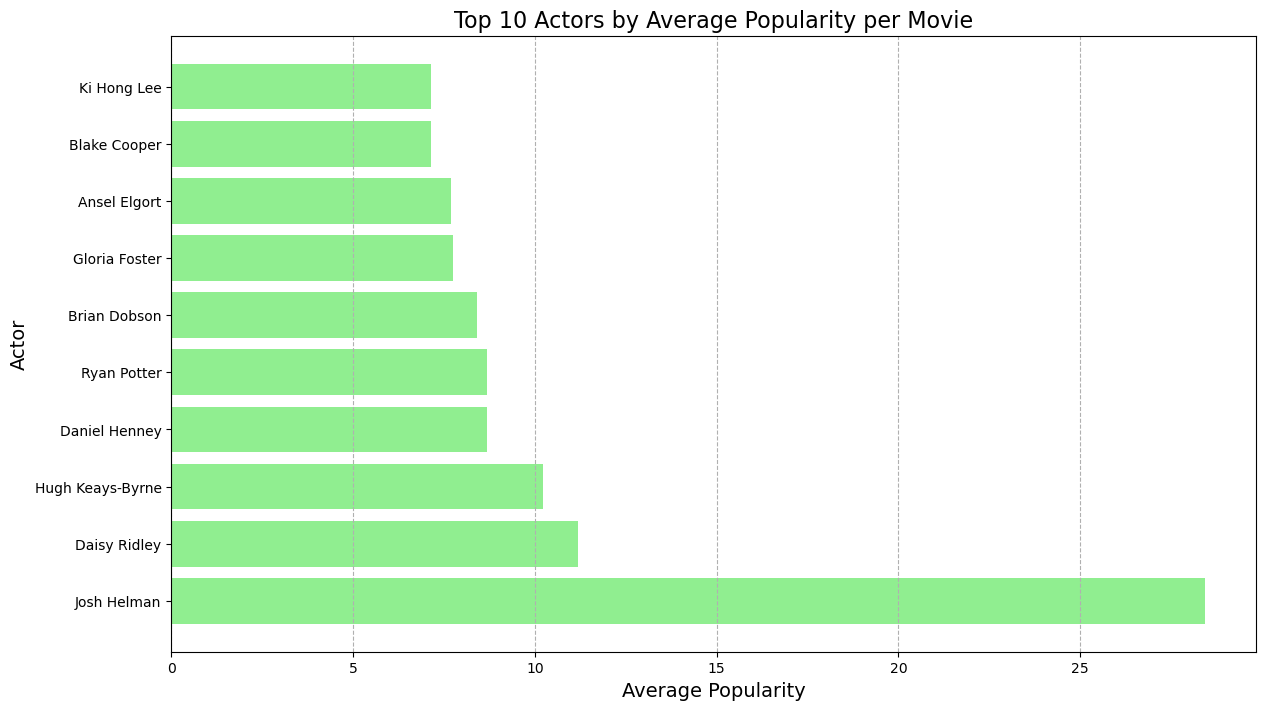

In [11]:
# Preparing data for plotting - Taking top 10 actors based on average popularity for a clearer graph
top_actors_popularity = actor_popularity_df_sorted.head(10)

plt.figure(figsize=(14, 8))
plt.barh(top_actors_popularity['Actor'], top_actors_popularity['Average Popularity'], color='lightgreen')
plt.title('Top 10 Actors by Average Popularity per Movie', fontsize=16)
plt.xlabel('Average Popularity', fontsize=14)
plt.ylabel('Actor', fontsize=14)
plt.grid(axis='x', linestyle='--')

plt.show()

#### I split the actors to investigate if a single actor can contribute to movies popularity.

<h3>Question 3: Are longer run time movies have a lower rating?</h3>

In [12]:
# Filter out rows with null or zero runtime or vote_average
filtered_df = df[(df['runtime'].notnull()) & (df['runtime'] > 0) & (df['vote_average'].notnull())]

# Calculate the correlation between runtime and vote_average
correlation = filtered_df[['runtime', 'vote_average']].corr()

### plotting a grid to see correlation beetween runtime and vote average

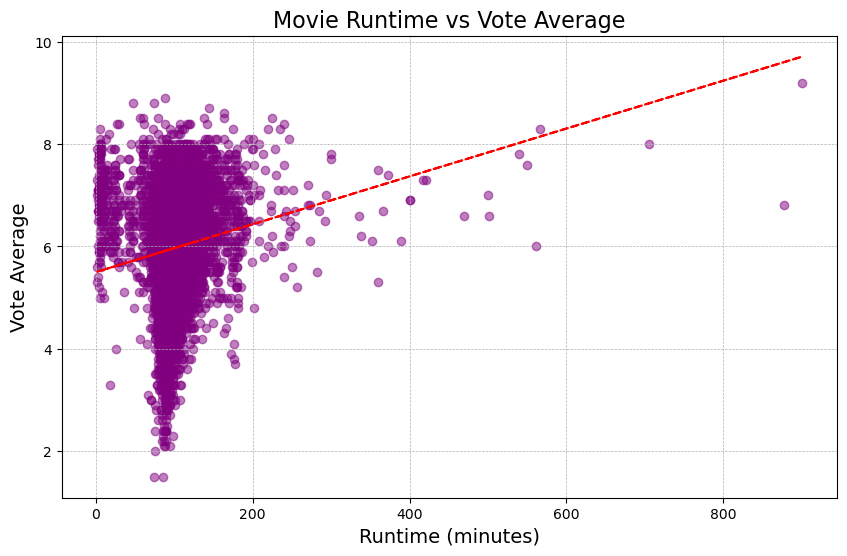

In [13]:
plt.figure(figsize=(10, 6))

# Scatter plot for runtime vs vote_average
plt.scatter(filtered_df['runtime'], filtered_df['vote_average'], alpha=0.5, color='purple')

plt.title('Movie Runtime vs Vote Average', fontsize=16)
plt.xlabel('Runtime (minutes)', fontsize=14)
plt.ylabel('Vote Average', fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Adding a trend line
z = np.polyfit(filtered_df['runtime'], filtered_df['vote_average'], 1)
p = np.poly1d(z)
plt.plot(filtered_df['runtime'], p(filtered_df['runtime']), "r--")

plt.show()

##### to investigate if there is a relationship between a movie's length and its perceived quality (as measured by average votes).

<a id=concl></a>
<h2>Conclusion:</h2>

1. **Movie Genre and Revenue:**
   The analysis shows that the Action genre generates the highest revenue, followed closely by Adventure, Comedy, Drama, and Thriller genres. This insight suggests that movies within these genres are more commercially successful, likely due to their wide appeal and ability to attract large audiences.
   
   

2. **Cast Members and Movie Popularity:**
   The investigation into the relationship between cast members and movie popularity indicated that certain actors are associated with higher movie popularity. Notably, actors such as Josh Helman and Daisy Ridley appear in movies with high popularity scores, suggesting that well-known or critically acclaimed actors can contribute positively to a movie's appeal and success.



3. **Runtime and Movie Ratings:**
   An analysis of the correlation between movie runtime and vote average showed a slight positive correlation, indicating that longer movies tend to have slightly higher ratings. This challenges the notion that longer movies are less enjoyable or poorly received by audiences. Instead, it suggests that movies with extended runtimes might offer richer storytelling or more detailed character development, which can translate to higher ratings. The scatter plot with a trend line further illustrated this relationship, showing that there isn't a significant trend towards lower ratings for longer movies.



### Overall Implications:
The findings from this dataset provide valuable insights into the factors that contribute to a movie's financial success, popularity, and critical reception. Specifically, selecting a genre with high revenue potential, casting popular actors, and not shying away from longer runtimes (when necessary for the story) could be considered strategic decisions in the movie production process. However, it's important to note that these factors are just part of a complex matrix that influences a movie's success, which can also include marketing strategies, release timing, and the quality of the movie itself.

These insights can serve filmmakers, producers, and marketers in the film industry as they make decisions about movie development, casting, and marketing strategies to maximize commercial success and audience engagement.

In [14]:
from subprocess import call
call(['python', '-m', 'nbconvert', '--to', 'html', 'TMdb Dataset.ipynb'])

0